In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

# Reflect Tables into SQLAlchemy ORM

In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [4]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [5]:
#Get table names from hawaii.sqlite
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

In [7]:
#Get a list of column names from the station table
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
#Get a list of column names from the measurement table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precip_dates = session.query(Measurement.date).all()
precip_dates


[('2010-01-01'),
 ('2010-01-02'),
 ('2010-01-03'),
 ('2010-01-04'),
 ('2010-01-06'),
 ('2010-01-07'),
 ('2010-01-08'),
 ('2010-01-09'),
 ('2010-01-10'),
 ('2010-01-11'),
 ('2010-01-12'),
 ('2010-01-14'),
 ('2010-01-15'),
 ('2010-01-16'),
 ('2010-01-17'),
 ('2010-01-18'),
 ('2010-01-19'),
 ('2010-01-20'),
 ('2010-01-21'),
 ('2010-01-22'),
 ('2010-01-23'),
 ('2010-01-24'),
 ('2010-01-25'),
 ('2010-01-26'),
 ('2010-01-27'),
 ('2010-01-28'),
 ('2010-01-30'),
 ('2010-01-31'),
 ('2010-02-01'),
 ('2010-02-03'),
 ('2010-02-04'),
 ('2010-02-05'),
 ('2010-02-06'),
 ('2010-02-07'),
 ('2010-02-08'),
 ('2010-02-09'),
 ('2010-02-11'),
 ('2010-02-12'),
 ('2010-02-13'),
 ('2010-02-14'),
 ('2010-02-15'),
 ('2010-02-16'),
 ('2010-02-17'),
 ('2010-02-19'),
 ('2010-02-20'),
 ('2010-02-21'),
 ('2010-02-22'),
 ('2010-02-23'),
 ('2010-02-24'),
 ('2010-02-25'),
 ('2010-02-26'),
 ('2010-02-28'),
 ('2010-03-01'),
 ('2010-03-02'),
 ('2010-03-03'),
 ('2010-03-04'),
 ('2010-03-05'),
 ('2010-03-06'),
 ('2010-03-07'

In [10]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date


('2017-08-23')

In [11]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)


2016-08-23


In [12]:
# Perform a query to retrieve the data and precipitation scores for last 12 months

precipitation_data = (session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date >= '2016-08-23').all())
precipitation_data_df = pd.DataFrame(precipitation_data)
precipitation_data_df.head(10)


,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


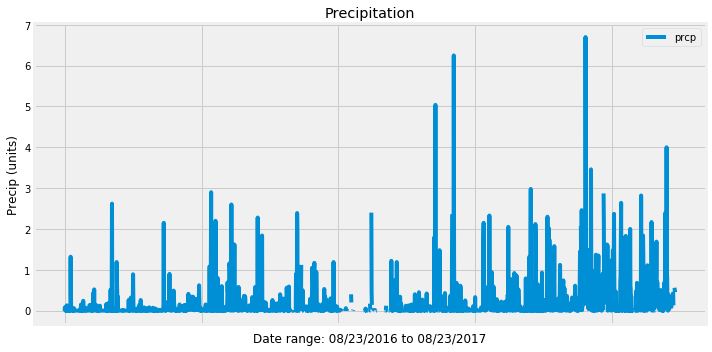

In [17]:
# Use Pandas Plotting with Matplotlib to plot the dat
#Create a plot
fig1 = precipitation_data_df.plot(x = 'date', y = 'prcp',figsize = (10,5))
#Set labels 
fig1.set_title("Precipitation")
fig1.set_ylabel("Precip (units)")
fig1.set_xlabel("Date range: 08/23/2016 to 08/23/2017")

plt.tight_layout()
#Save figure as a .png
fig = fig1.get_figure()
fig.savefig("precipitation.png")

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precipition_summary = precipitation_data_df.describe()
precipition_summary

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.station).count()
station_count


9

In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
mostactive_info = session.query(func.max(Measurement.tobs),func.avg(Measurement.tobs),func.min(Measurement.tobs)).\
              filter(Measurement.station == 'USC00519281').all()
mostactive_info


[(85.0, 71.66378066378067, 54.0)]

In [22]:
# Choose the station with the highest number of temperature observations.
stations_highest = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()
stations_highest

('USC00519281', 2772)

In [23]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
mostactive_query = (session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= '2016-08-23').all())
mostactive_query_df = pd.DataFrame(mostactive_query)
mostactive_query_df.head()


,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


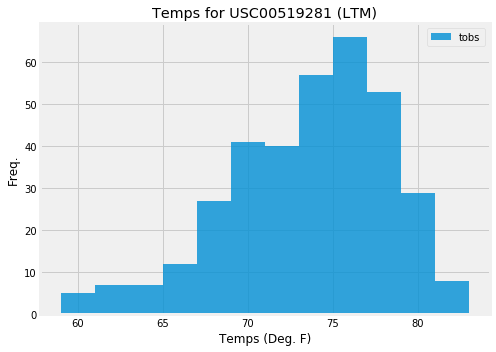

In [24]:
# Use Pandas Plotting with Matplotlib to plot a histogram
#Plot Style Set At Beginning

#Create a bar chart
fig2= mostactive_query_df.plot(x = 'date', y = 'tobs',kind = 'hist',
                            bins = 12,figsize = (7,5),alpha = 0.8)
#Set labels etc.
fig2.set_title("Temps for USC00519281 (LTM)")
fig2.set_ylabel("Freq.")
fig2.set_xlabel("Temps (Deg. F)")
#Set y ticks with start= 0, end = 70, stepsize = 10
fig2.set_yticks(np.arange(0,70, 10))

plt.tight_layout()
#Save figure as a .png
fig = fig2.get_figure()
fig.savefig("temperature.png")

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [28]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


range_prediction = calc_temps('2016-08-23', '2017-08-23')
range_prediction = list(np.ravel(range_prediction))
range_prediction

[58.0, 74.59058295964125, 87.0]

In [31]:
# Defining tavg, tmax, tmin for chart
tavg = range_prediction[1]
tmin = range_prediction[0]
tmax = range_prediction[2]
variance = tmax - tmin

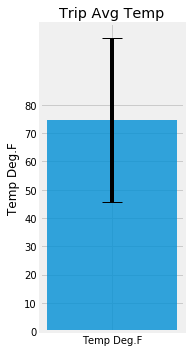

In [38]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


# Creating plot
fig3, ax = plt.subplots(figsize = (2.75,5))
ax.bar("Temp Deg.F", tavg, yerr = variance,
       capsize = 10, alpha = 0.8)
ax.set_yticks(np.arange(0,90,10))
ax.set_title("Trip Avg Temp")
ax.set_ylabel("Temp Deg.F")
plt.tight_layout()
#Save figure as a .png
fig = fig3.get_figure()
fig3.savefig("AvgTemp.png")
